<img src='img/task.png'>

<img src='img/desc.png'>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)

In [2]:
train = pd.read_csv('data/ml_case_training_data.csv')
hist = pd.read_csv('data/ml_case_training_hist_data.csv')
output = pd.read_csv('data/ml_case_training_output.csv')

## Customer data

In [3]:
# display the data
train.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [4]:
# check if there are duplicates
train.duplicated().any()

False

In [5]:
# check datatypes & non-null counts
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             11878 non-null  object 
 4   cons_12m                  16096 non-null  int64  
 5   cons_gas_12m              16096 non-null  int64  
 6   cons_last_month           16096 non-null  int64  
 7   date_activ                16096 non-null  object 
 8   date_end                  16094 non-null  object 
 9   date_first_activ          3508 non-null   object 
 10  date_modif_prod           15939 non-null  object 
 11  date_renewal              16056 non-null  object 
 12  forecast_base_bill_ele    3508 non-null   float64
 13  forecast_base_bill_year   3508 non-null   float64
 14  foreca

#### Some observations
* Drop `campaign_disc_ele` which has no entries. 
* Dates (`date_activ`, `date_end`, `date_first_activ`, `date_modif_prod`, `date_renewal`) need to be converted to `datetime64[ns]`
* A lot of columns have missing values. Remove entries with more than 70% missing values.
* Impute missing values in categorical columns with NONE.
* Replace missing values in numerical columns with the median.

In [6]:
# verify missing values
(train.isna().sum() / train.shape[0] * 100).sort_values(ascending=False)

campaign_disc_ele           100.000000
forecast_bill_12m            78.205765
date_first_activ             78.205765
forecast_cons                78.205765
forecast_base_bill_ele       78.205765
forecast_base_bill_year      78.205765
activity_new                 59.300447
channel_sales                26.205268
date_modif_prod               0.975398
forecast_price_pow_p1         0.782803
forecast_price_energy_p2      0.782803
forecast_price_energy_p1      0.782803
forecast_discount_energy      0.782803
origin_up                     0.540507
date_renewal                  0.248509
net_margin                    0.093191
margin_net_pow_ele            0.080765
margin_gross_pow_ele          0.080765
pow_max                       0.018638
date_end                      0.012425
imp_cons                      0.000000
nb_prod_act                   0.000000
num_years_antig               0.000000
id                            0.000000
has_gas                       0.000000
forecast_meter_rent_12m  

In [7]:
# drop missing values
train = train.drop(['campaign_disc_ele', 'date_first_activ', 'forecast_base_bill_ele', 'forecast_base_bill_year', 'forecast_bill_12m', 'forecast_cons'], axis='columns') 

In [8]:
# convert datatypes
date_cols = [col for col in train if col.startswith('date')]
for col in date_cols:
    train[col] = pd.to_datetime(train[col])

In [9]:
# replace NaN with median
num_cols = [col for col in train.select_dtypes(include=['int64', 'float64']) if train[col].isna().sum() > 0]
for col in num_cols:
    train[col] = train[col].fillna(train[col].median())

In [10]:
# replace NaN with NONE
cat_cols = [col for col in train.select_dtypes(include=['object']) if train[col].isna().sum() > 0]
for col in cat_cols:
    train[col] = train[col].fillna('NONE')

In [11]:
# replace NaN dates with most frequent
date_cols = [col for col in train.select_dtypes(include='datetime64[ns]') if train[col].isna().sum() > 0]
for col in date_cols:
    train[col] = train[col].fillna(train[col].value_counts().index[0])

In [12]:
# display stats
train.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,1.609600e+04,1.609600e+04,1.609600e+04,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000,16096.000000
mean,1.948044e+05,3.191164e+04,1.946154e+04,2370.555949,1907.347229,0.983785,70.309945,0.135955,0.053211,43.539585,196.123447,22.461168,21.459922,1.347788,217.895415,5.030629,20.602873
std,6.795151e+05,1.775885e+05,8.235676e+04,4035.085664,5257.364759,5.141470,79.023251,0.026157,0.048515,5.192262,494.366979,23.691341,27.906076,1.459808,366.583368,1.676101,21.770587
min,-1.252760e+05,-3.037000e+03,-9.138600e+04,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000
25%,5.906250e+03,0.000000e+00,0.000000e+00,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,12.025000,11.950000,1.000000,52.017500,4.000000,12.500000
50%,1.533250e+04,0.000000e+00,9.010000e+02,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000
75%,5.022150e+04,0.000000e+00,4.127000e+03,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.735000,6.000000,19.800000
max,1.609711e+07,4.188440e+06,4.538720e+06,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000


#### Some observations
* Some columns have minimum negative values which is highly unlikely. Replace them with median.
* Highly skewed columns.

In [13]:
train = pd.merge(train, output, on='id')

In [14]:
train.head()

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,NONE,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NONE,NONE,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,NONE,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,NONE,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0


<AxesSubplot:xlabel='churn', ylabel='count'>

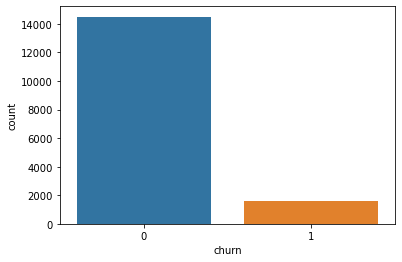

In [15]:
sns.countplot(data=train, x='churn')

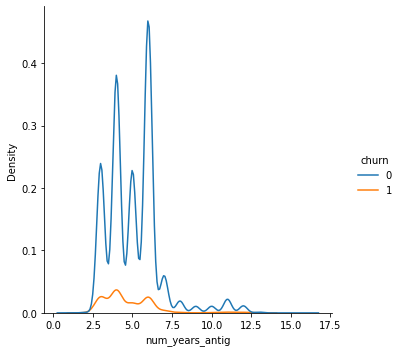

In [16]:
sns.displot(data=train, x='num_years_antig', hue='churn', kind='kde')

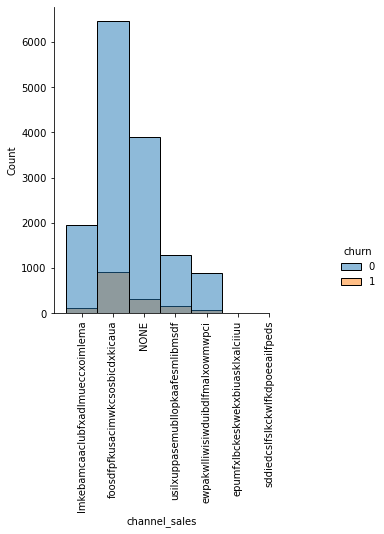

In [17]:
sns.displot(data=train, x='channel_sales', hue='churn')
plt.xticks(rotation=90)
plt.xlim(right=6)
plt.show()

#### Consumption

In [18]:
def plot_consumption(df, column, bins=20):
    dt = pd.DataFrame({'Retention': df[df['churn'] == 0][column],
                       'Churned': df[df['churn'] == 1][column]})
    dt[['Retention','Churned']].plot(kind='hist', 
                                       bins=bins, stacked=True);
    plt.title(column)

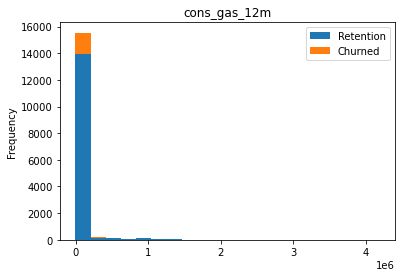

In [19]:
plot_consumption(train, 'cons_gas_12m')

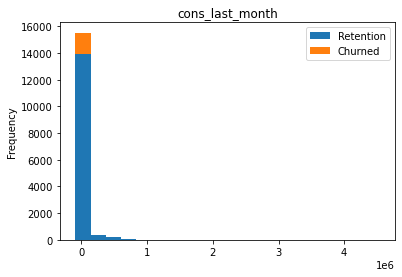

In [20]:
plot_consumption(train, 'cons_last_month')

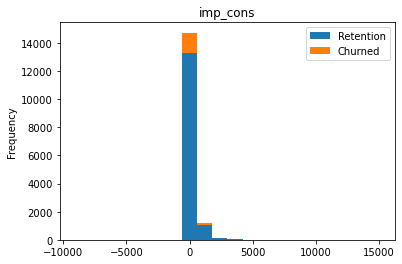

In [21]:
plot_consumption(train, 'imp_cons')

#### Outliers

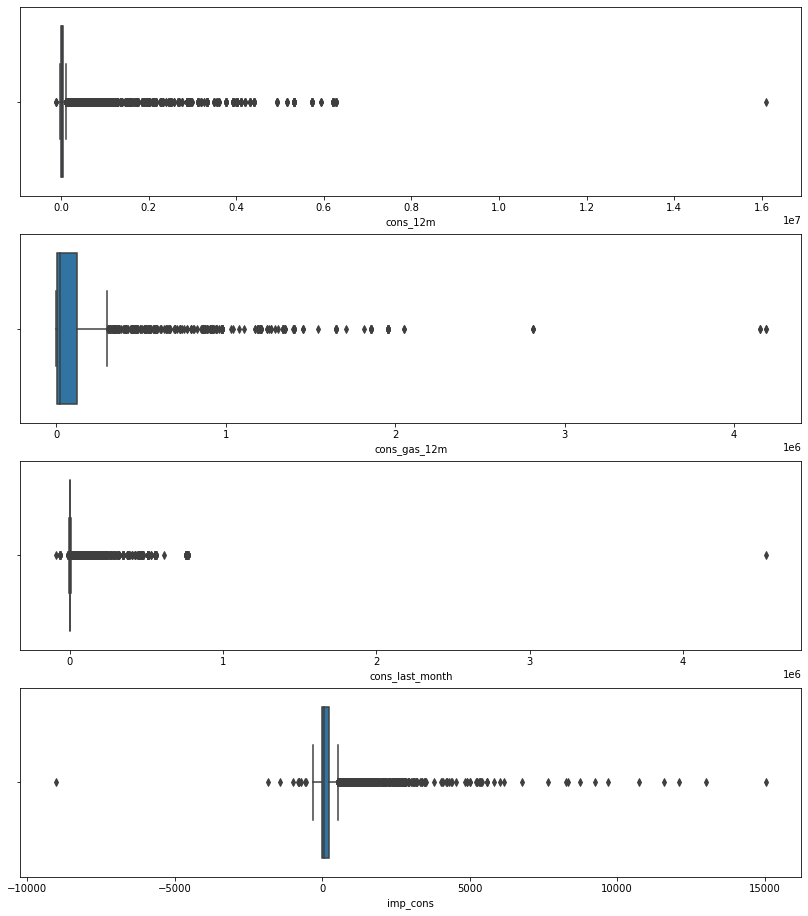

In [22]:
fig, axs = plt.subplots(nrows=4, figsize=(14,16))

sns.boxplot(x=train['cons_12m'], ax=axs[0])
sns.boxplot(x=train[train['has_gas'] == 't']['cons_gas_12m'], ax=axs[1])
sns.boxplot(x=train['cons_last_month'], ax=axs[2])
sns.boxplot(x=train['imp_cons'], ax=axs[3])
plt.show()

#### Dates

In [23]:
def plot_dates(df, col, figsize=(20,8)):
    month = df[[col, 'churn', 'id']].set_index(col).groupby([pd.Grouper(freq='M'),'churn']).count().unstack(level=1)
    ax = month.plot(kind='bar', stacked=True, figsize=figsize, rot=0)
    plt.ylabel('Number of Companies')
    plt.legend(['Not Churned', 'Churned'], loc='best')
    plt.xlabel('')
    ax.set_xticklabels(map(lambda x: x_format(x), month.index));
    
def x_format(label):
    m = label.month_name()[:1]
    if label.month_name() == 'January':
        m += f'\n{label.year}'
    return m

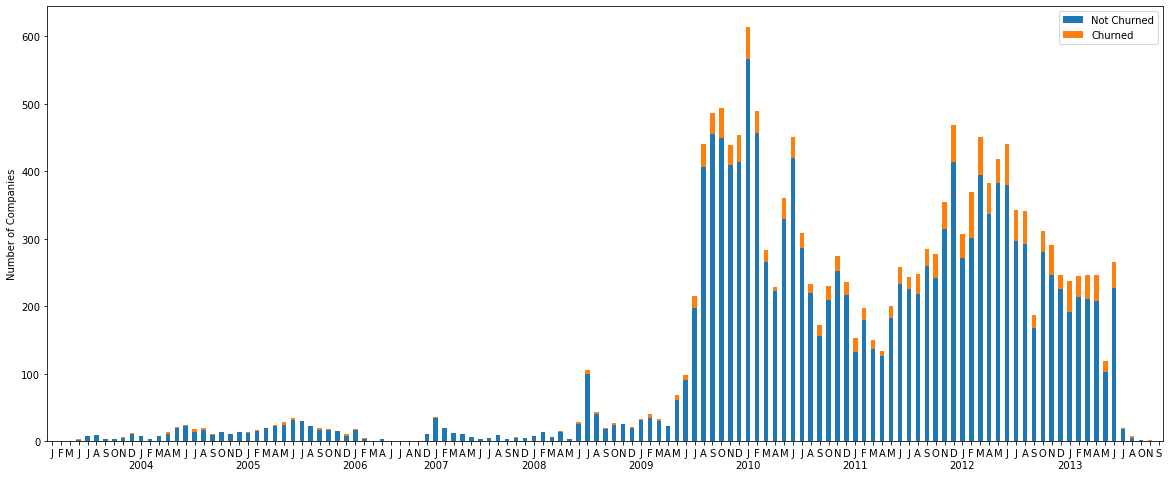

In [24]:
plot_dates(train, 'date_activ')

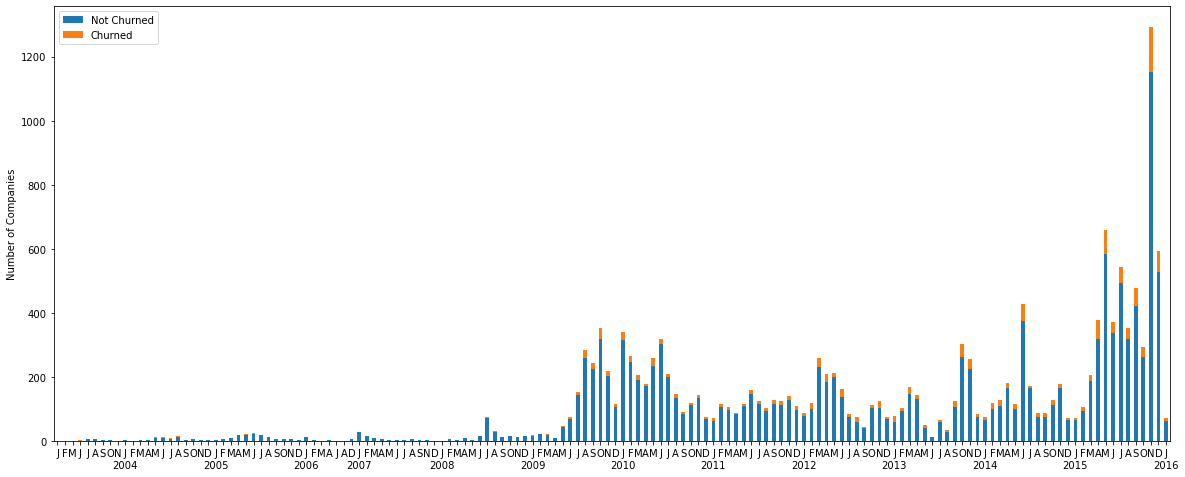

In [25]:
plot_dates(train, 'date_modif_prod')

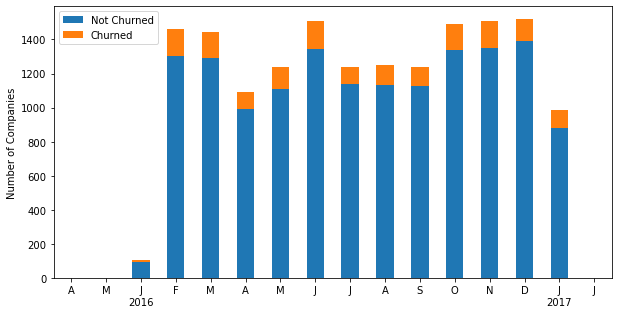

In [26]:
plot_dates(train, 'date_end', figsize=(10,5))

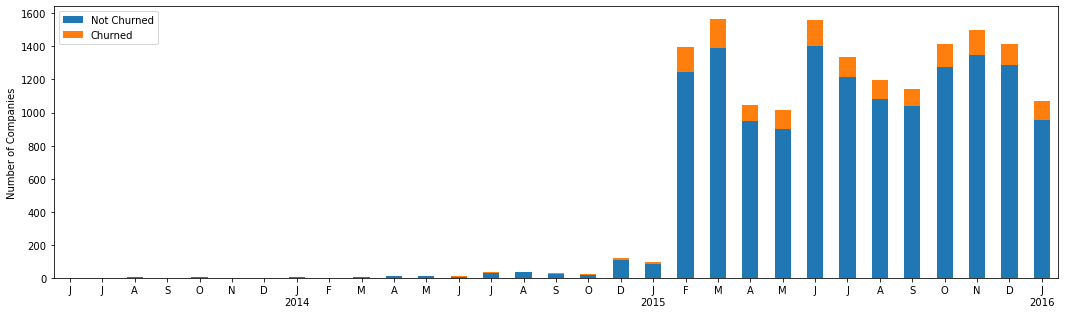

In [27]:
plot_dates(train, 'date_renewal', figsize=(18,5))

Date and churn distribution in these visualization do not provide any insights. Duration will be created out of these dates to verify if there are any pattern.

#### Forecast

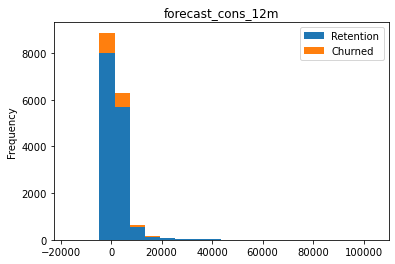

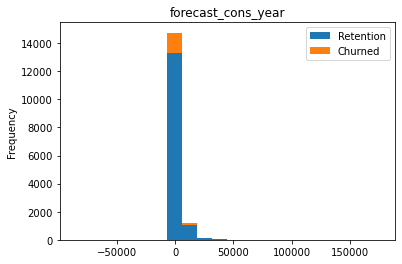

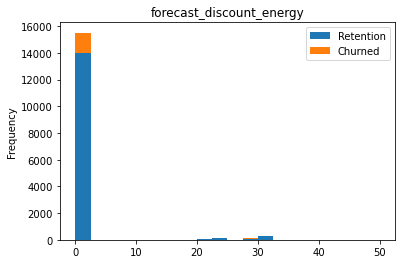

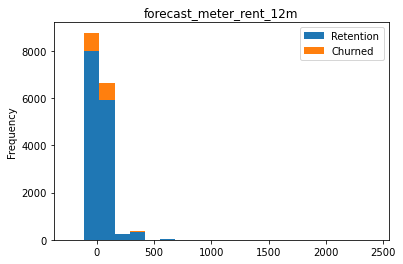

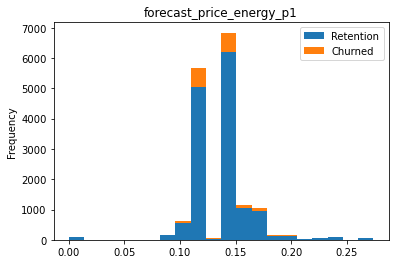

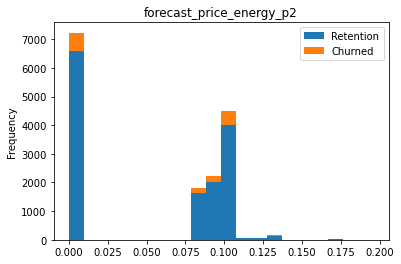

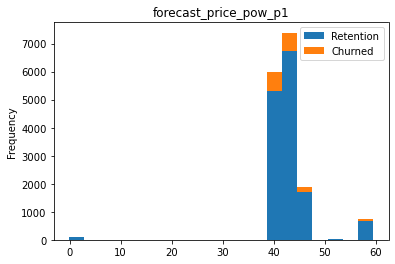

In [28]:
forecasts = [c for c in train.columns if c.startswith('forecast')]

for col in forecasts:
    plot_consumption(train, col)

These forecast features are highly skewed.

In [29]:
def plot_distribution(dataframe, column, ax, bins_ = 50):
    '''
    Plot variable distribution in a stcked histogram of churned or related company
    '''
    # create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({'Retention': dataframe[dataframe['churn'] == 0][column],
                        'Churn': dataframe[dataframe['churn'] == 1][column]})
    # plot the histogram
    temp[['Retention', 'Churn']].plot(kind = 'hist', bins = bins_, ax = ax, stacked = True)
    # X-axis label
    ax.set_xlabel(column)
    # change the x-axis to the plain style
    ax.ticklabel_format(style = 'plain', axis = 'x')

In [30]:
margin = train[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'churn']]

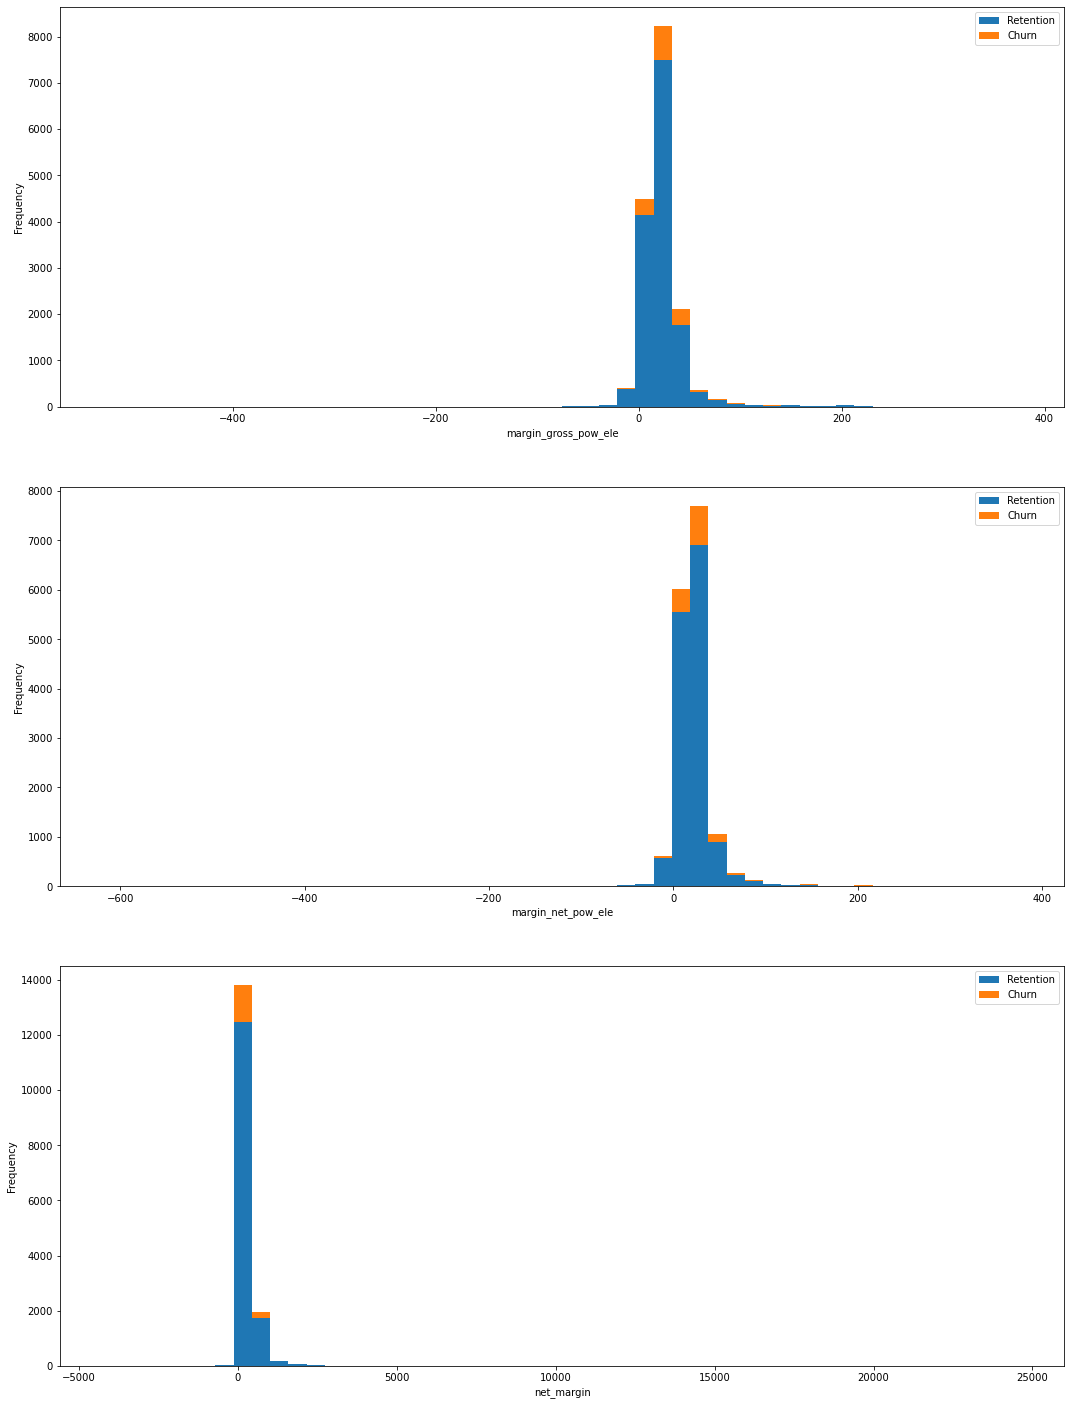

In [31]:
fig, axs = plt.subplots(nrows = 3, figsize = (18, 25))
plot_distribution(train, 'margin_gross_pow_ele', axs[0])
plot_distribution(train, 'margin_net_pow_ele', axs[1])
plot_distribution(train, 'net_margin', axs[2])

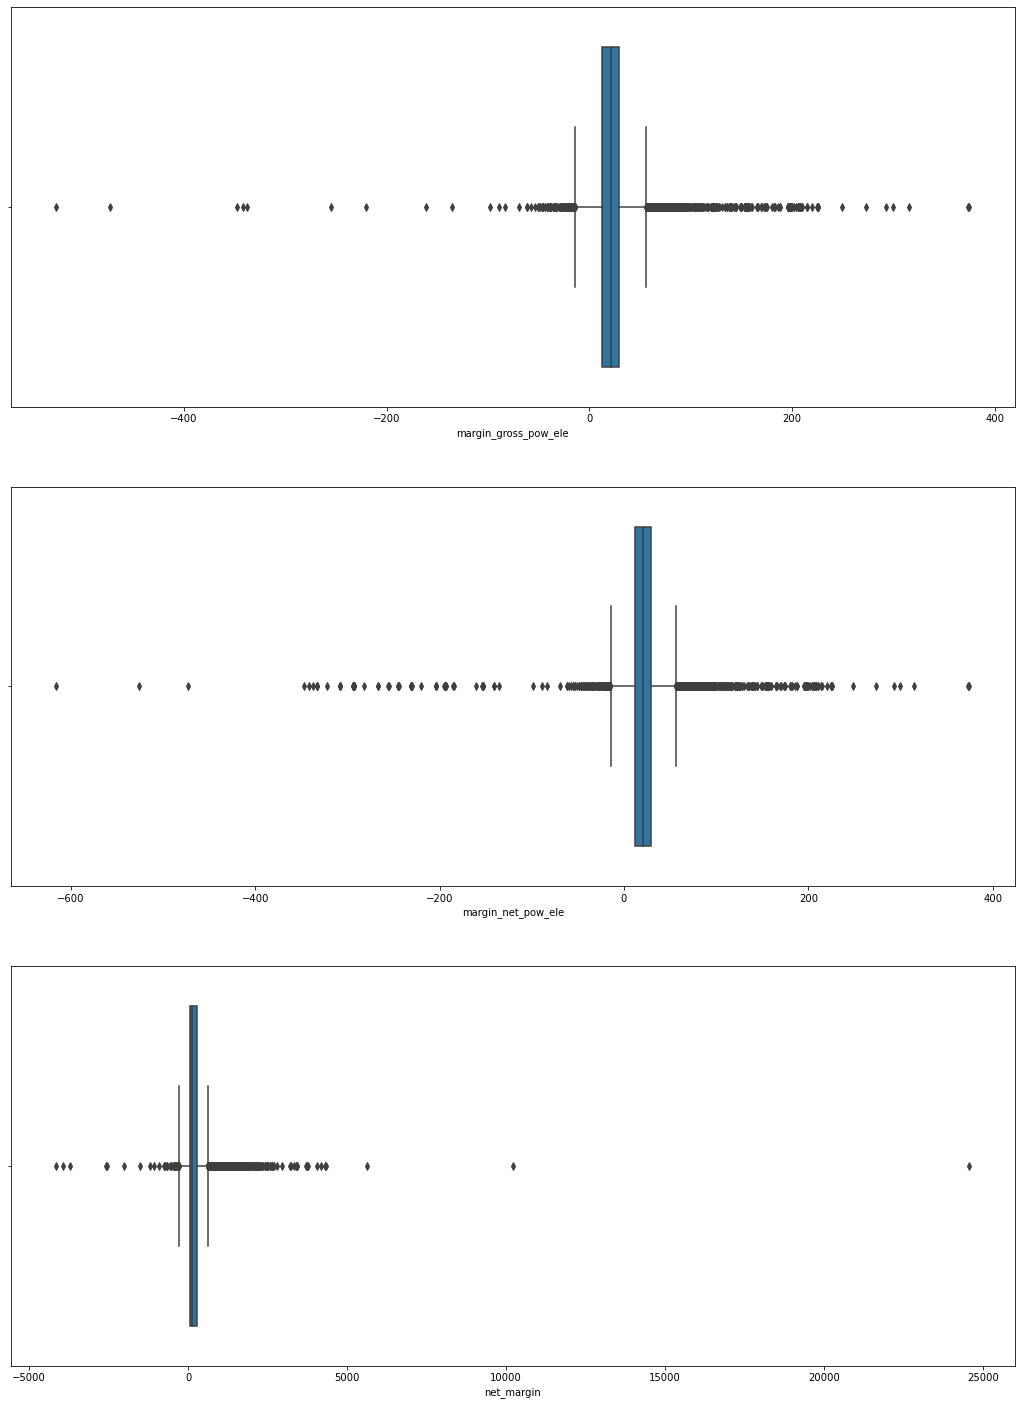

In [32]:
fig, axs = plt.subplots(nrows = 3, figsize = (18, 25))
sns.boxplot(x='margin_gross_pow_ele', data=train, ax = axs[0]);
sns.boxplot(x='margin_net_pow_ele', data=train, ax = axs[1]);
sns.boxplot(x='net_margin', data=train, ax = axs[2]);

Margins seems skewed with a few outliers.

## Price data

In [33]:
# display the data
hist.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [34]:
# check if there are duplicates
hist.duplicated().any()

False

In [35]:
# check datatypes & missing values
hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            193002 non-null  object 
 1   price_date    193002 non-null  object 
 2   price_p1_var  191643 non-null  float64
 3   price_p2_var  191643 non-null  float64
 4   price_p3_var  191643 non-null  float64
 5   price_p1_fix  191643 non-null  float64
 6   price_p2_fix  191643 non-null  float64
 7   price_p3_fix  191643 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


#### Some observations
* `price_date` has the wrong datatype. Convert to `datetime`.
* The prices have the same number of missing values. Fill with median.

In [36]:
# convert datatypes
hist['price_date'] = pd.to_datetime(hist['price_date']) 

In [37]:
# fill NaN with median
price_cols = [col for col in hist.select_dtypes(include=np.number)]
for col in price_cols:
    hist[col] = hist[col].fillna(hist[col].median())

In [38]:
# display stats
hist.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.332175,10.622871,6.409981
std,0.025032,0.049924,0.036298,5.419345,12.841899,7.773595
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


#### Some observations
* The prices of power have minimum negative values, which is unlikely. We'll replace them with the absolute value.

In [39]:
# Merge prices with churn 
df = pd.merge(hist, output, on='id')

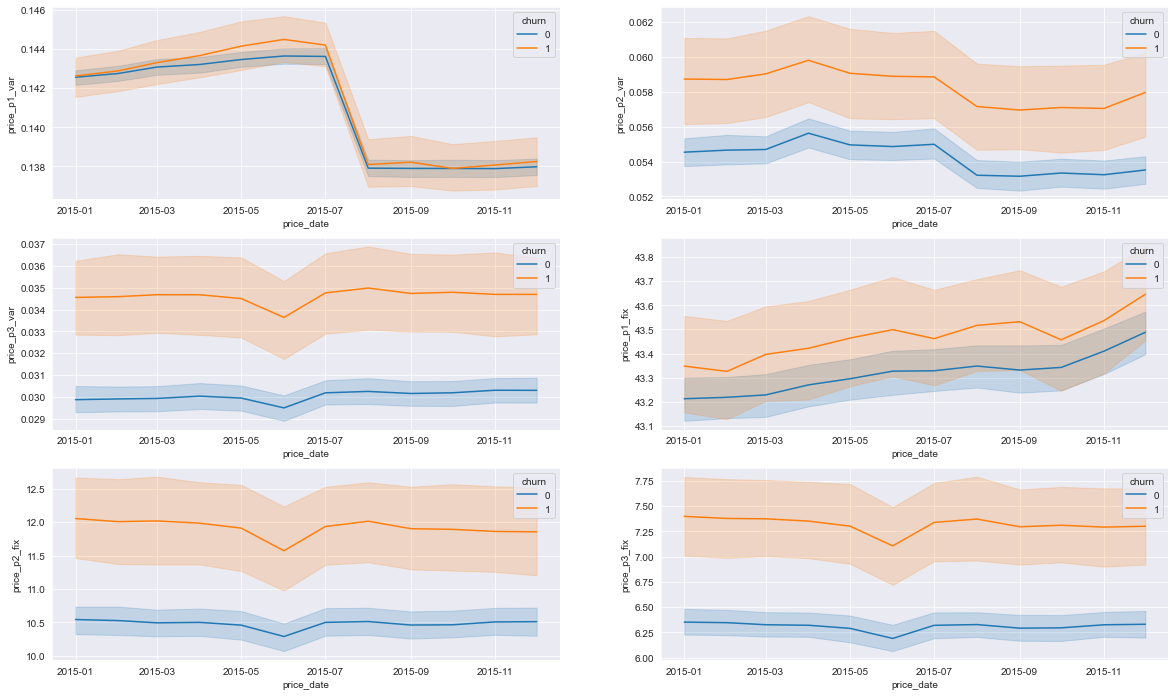

In [40]:
# Time Series Visualization
sns.set_style(style='darkgrid')
fig, ax = plt.subplots(3,2, figsize=(20,12))
plt.subplot(3,2,1)
sns.lineplot(x='price_date', y='price_p1_var', hue='churn', data=df)
plt.subplot(3,2,2)
sns.lineplot(x='price_date', y='price_p2_var', hue='churn', data=df)
plt.subplot(3,2,3)
sns.lineplot(x='price_date', y='price_p3_var', hue='churn', data=df)
plt.subplot(3,2,4)
sns.lineplot(x='price_date', y='price_p1_fix', hue='churn', data=df)
plt.subplot(3,2,5)
sns.lineplot(x='price_date', y='price_p2_fix', hue='churn', data=df)
plt.subplot(3,2,6)
sns.lineplot(x='price_date', y='price_p3_fix', hue='churn', data=df)
plt.show()

* The customers who have churned generally paid higher prices in all of the seasons
* The value of churn and non-churn in `price_p1_var` is almost similar. Drop the column.
* Transform the monthly price data to yearly.

#### Duplicates

In [41]:
# Remove duplicates
df.drop_duplicates(keep='first', inplace=True)

#### Negative values

In [42]:
hist[(hist.price_p1_fix < 0) |(hist.price_p2_fix < 0) | (hist.price_p3_fix < 0)]

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
23138,951d99fe07ca94c2139f43bc37095139,2015-03-01,0.125976,0.103395,0.071536,-0.162916,-0.097749,-0.065166
28350,f7bdc6fa1067cd26fd80bfb9f3fca28f,2015-03-01,0.131032,0.108896,0.076955,-0.162916,-0.097749,-0.065166
98575,9b523ad5ba8aa2e524dcda5b3d54dab2,2015-02-01,0.129444,0.106863,0.075004,-0.162916,-0.097749,-0.065166
113467,cfd098ee6c567eb32374c77d20571bc7,2015-02-01,0.123086,0.100505,0.068646,-0.162916,-0.097749,-0.065166
118467,51d7d8a0bf6b8bd94f8c1de7942c66ea,2015-07-01,0.128132,0.105996,0.074056,-0.162912,-0.097752,-0.065172
125819,decc0a647016e183ded972595cd2b9fb,2015-03-01,0.124937,0.102814,0.069071,-0.162916,-0.097749,-0.065166
128761,cc214d7c05de3ee17a7691e274ac488e,2015-06-01,0.124675,0.102539,0.070596,-0.162912,-0.097752,-0.065172
141011,2a4ed325054472e03cdcc9a34693be4b,2015-02-01,0.167317,0.083347,0.000000,-0.177779,0.000000,0.000000
160827,395a6f41bbd1a0f23a64f00645264e78,2015-04-01,0.121352,0.098771,0.066912,-0.162916,-0.097749,-0.065166
181811,d4a84ff4ec620151ef05bdef0cf27eab,2015-05-01,0.125976,0.103395,0.071536,-0.162916,-0.097749,-0.065166


In [43]:
# fix negative values
fix_cols = [col for col in hist if col.endswith('fix')]
for col in fix_cols:
    hist.loc[hist[col] < 0, col] = hist[col].abs()